In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import requests
import datetime

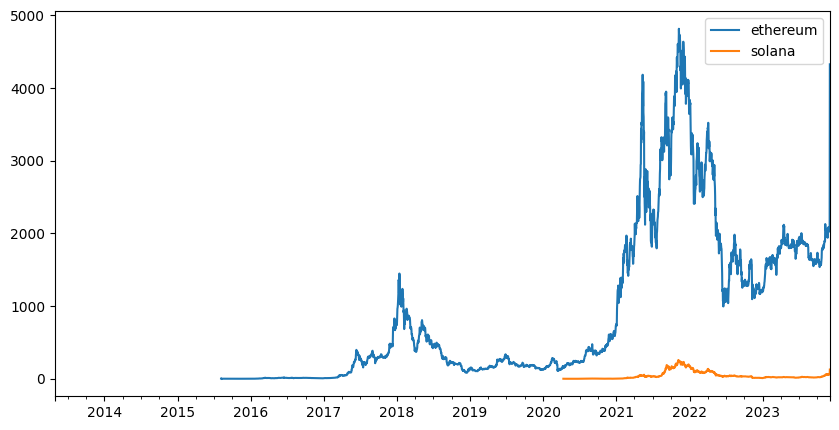

In [95]:
df = pd.read_csv("../data/prices.csv", index_col=0)
df.index = pd.to_datetime(df.index, format='mixed').normalize()
df = df.groupby(df.index).sum()
df = df.replace(0, np.nan)
df[['ethereum', 'solana']].plot(figsize=(10, 5))
plt.show()

In [2]:
p = pd.DataFrame()
v = pd.DataFrame()
m = pd.DataFrame()

for id in tqdm(['solana', 'ethereum']):
    START = datetime.datetime(2020, 1, 2)
    END = datetime.datetime(2023, 1, 2)
    current = START
    count = 0
    prices = []
    volumes = []
    market_caps = []
    time.sleep(32)
    while current < END:
        if count >= 6:
            time.sleep(32)
            count = 0
            
        _from = current
        _to = current + datetime.timedelta(days=90)
        data = {"vs_currency": "usd", "from": _from.timestamp(), "to": _to.timestamp()}
        url = f"https://api.coingecko.com/api/v3/coins/{id}/market_chart/range"
        response = requests.get(url, params=data)
        print(response)
        prices += response.json()["prices"]
        volumes += response.json()["total_volumes"]
        market_caps += response.json()["market_caps"]

        current = _to
        count += 1
    
    price_df = pd.DataFrame(prices, columns=["date", id], index=[pd.to_datetime(x[0], unit='ms') for x in prices]).drop(columns=["date"])
    volume_df = pd.DataFrame(volumes, columns=["date", id], index=[pd.to_datetime(x[0], unit='ms') for x in volumes]).drop(columns=["date"])
    market_cap_df = pd.DataFrame(market_caps, columns=["date", id], index=[pd.to_datetime(x[0], unit='ms') for x in market_caps]).drop(columns=["date"])
    p = pd.concat([p, price_df], axis=1)
    v = pd.concat([v, volume_df], axis=1)
    m = pd.concat([m, market_cap_df], axis=1)
    

def clean_df(df):
    df.index = df.index.round('H')
    df = df.groupby(df.index).mean().dropna()
    return df.replace(0, np.nan)


p = clean_df(p)
v = clean_df(v)
m = clean_df(m)

p.to_csv("../data/prices.csv")
v.to_csv("../data/volumes.csv")
m.to_csv("../data/market_caps.csv")

  0%|          | 0/2 [00:00<?, ?it/s]

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


 50%|█████     | 1/2 [02:10<02:10, 130.00s/it]

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


100%|██████████| 2/2 [04:03<00:00, 121.51s/it]


In [11]:
p.index.round('H')

DatetimeIndex(['2020-01-01 23:00:00', '2020-01-02 00:00:00',
               '2020-01-02 01:00:00', '2020-01-02 02:00:00',
               '2020-01-02 03:00:00', '2020-01-02 04:00:00',
               '2020-01-02 05:00:00', '2020-01-02 06:00:00',
               '2020-01-02 07:00:00', '2020-01-02 08:00:00',
               ...
               '2023-03-16 18:00:00', '2023-03-16 18:00:00',
               '2023-03-16 19:00:00', '2023-03-16 19:00:00',
               '2023-03-16 20:00:00', '2023-03-16 20:00:00',
               '2023-03-16 21:00:00', '2023-03-16 21:00:00',
               '2023-03-16 22:00:00', '2023-03-16 22:00:00'],
              dtype='datetime64[ns]', length=41094, freq=None)

<Axes: >

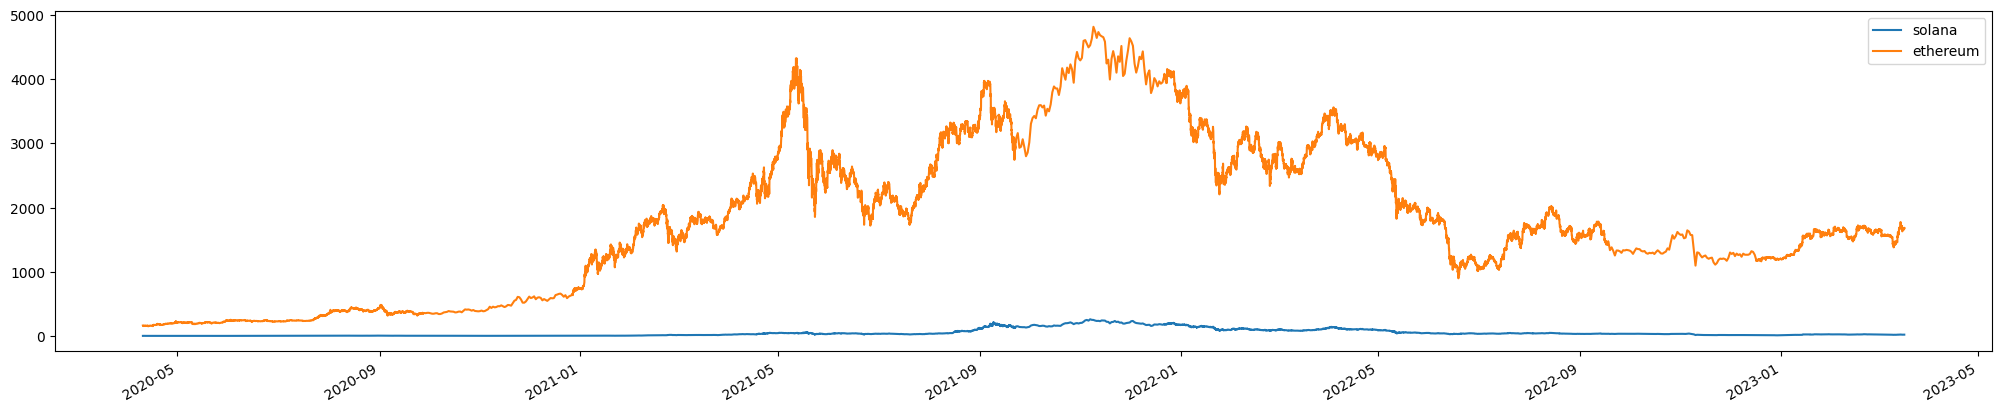

In [22]:
test = p.copy()
test.index = test.index.round('H')
test = test.groupby(test.index).mean().dropna()
test = test.replace(0, np.nan)
test.plot(figsize=(25, 5))

<Axes: >

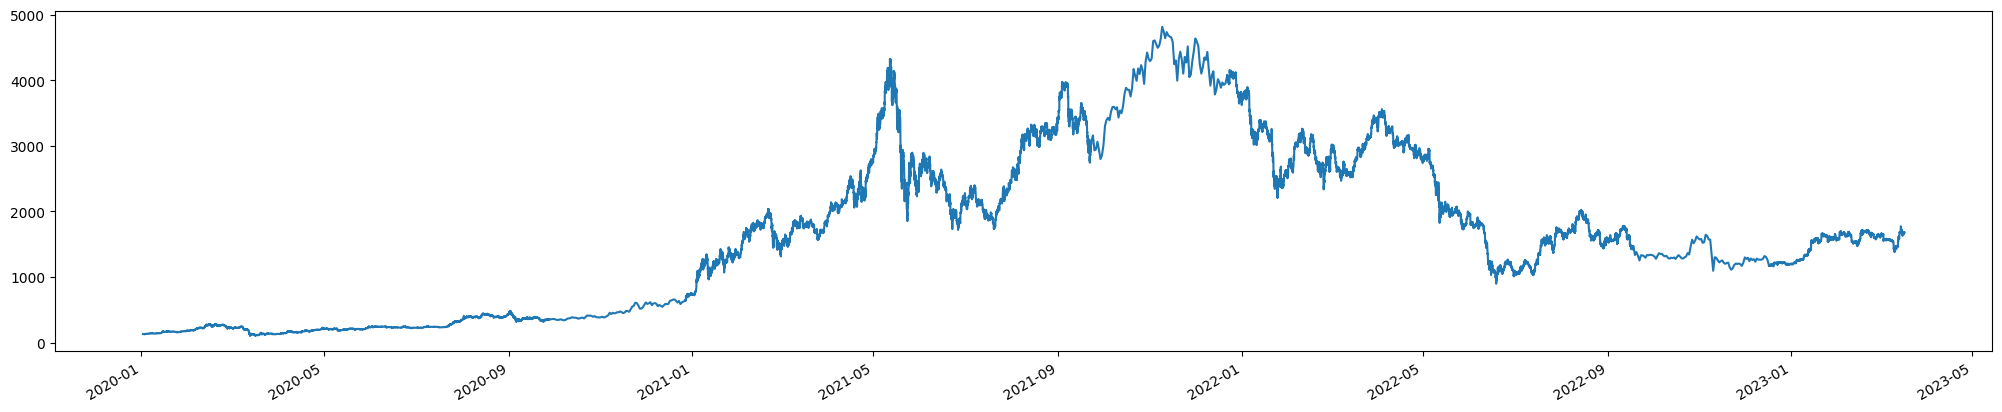

In [20]:
p['ethereum'].dropna().plot(figsize=(25, 5))

""
